In [14]:
# %matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 线性回归模型

## 最小二乘线性回归  

`linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)`  
初始化参数：
+ `fit_intercept`, 是否拟合截距项. False表示不拟合，比如在数据已经做过中心化的情况下就不需要
+ `normalize`, 是否对数据进行标准化.  如果`fit_intercept=False`，这个参数就会被忽略.
+ `copy_X`, 
+ `positive`, 如果为True，就会强制使系数都大于0 —— 这个参数不知道有什么用.  
  
属性值:
+ `coef_`, shape=`(n_features,)`，特征的系数
+ `intercept_`, 截距项
+ `rank_`, 训练数据的秩
+ `singular_`, 训练数据的奇异值向量

下面的例子来自于官网 [Linear Regression Example](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_diabetes
bunch = load_diabetes()
print(bunch.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [26]:
X = pd.DataFrame(bunch.data, columns=bunch.feature_names)

# 这里只使用 BMI 一个特征
X = X[['bmi']]
y = bunch.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 1)
(133, 1)
(309,)
(133,)


In [30]:
regr = LinearRegression()

In [31]:
regr.fit(X_train, y_train)

LinearRegression()

In [33]:
print(f"coef_: {regr.coef_},  intercept_: {regr.intercept_}")

coef_: [896.07168274],  intercept_: 150.4558223877005


In [34]:
regr.score(X_train, y_train)

0.3063546515993377

In [35]:
y_pred = regr.predict(X_test)

In [38]:
mean_squared_error(y_test, y_pred)

3839.8353121625914

In [39]:
r2_score(y_test, y_pred)

0.4071157854790054

In [42]:
y_train_pred = regr.predict(X_train)

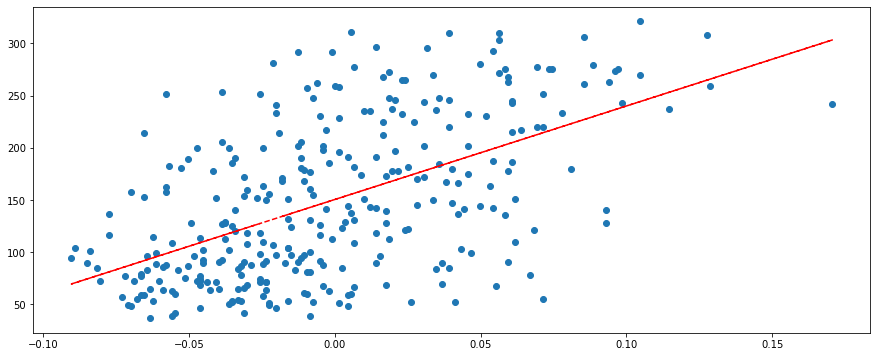

In [52]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.scatter(X_train, y_train)
ax.plot(X_train.values, y_train_pred, '--r')

In [64]:
df = pd.DataFrame({'bmi': X_train['bmi'], 'y_true': y_train, 'y_pred': y_train_pred})
df.head()

,bmi,y_true,y_pred
19,-0.018062,168.0,134.271077
377,0.009961,235.0,159.381796
72,-0.004050,202.0,146.826436
118,-0.010517,179.0,141.031655
94,-0.016984,90.0,135.236874


<AxesSubplot:xlabel='bmi', ylabel='y_true'>

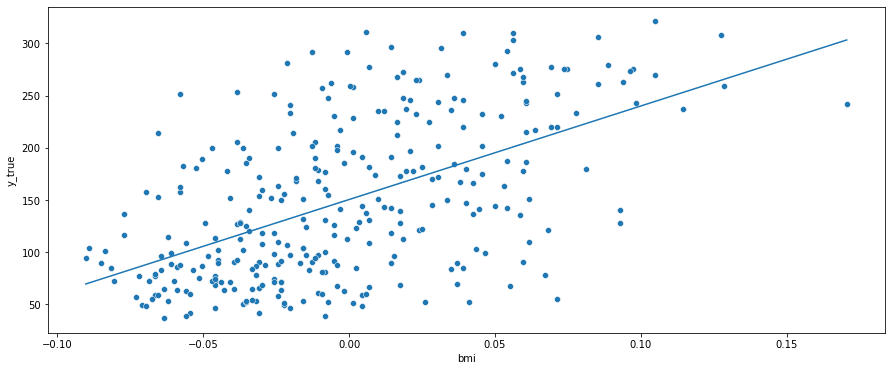

In [73]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
sns.scatterplot(data=df, x='bmi', y='y_true')
sns.lineplot(data=df, x='bmi', y='y_pred')

## 岭回归  

正则项为：
$\mathop{min}\limits_{w}||Xw-y||_2^2 + \alpha ||w||_2^2$


`linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)`  

初始化参数:
+ `alpha`，正则项系数  


属性值：
+ `coef_`
+ `intercept_`


## LASSO回归  

正则项：
$\mathop{min}\limits_{w}||Xw-y||_2^2 + \alpha ||w||_1$


`linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')`  

导入模型

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

-----

## 生成数据
下面的数据用于拟合模型

In [71]:
rng = np.random.RandomState(29)
# X = rng.uniform(-3, 3, size=(100,2))
X = rng.uniform(-3, 3, size=100)
y = np.sin(X) +  rng.normal(size=len(X),scale=0.3)

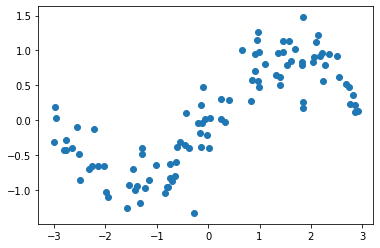

In [72]:
plt.scatter(X,y)

## 使用原始数据进行建模

In [73]:
# 需要对X的维度进行一些变换
X = X.reshape(-1,1)
X.shape

(100, 1)

In [74]:
# 测试数据的X坐标
sin_x = np.linspace(-3,3,1000).reshape(-1,1)

In [75]:
linearR = LinearRegression().fit(X,y)

In [76]:
treeR = DecisionTreeRegressor(random_state=0).fit(X,y)

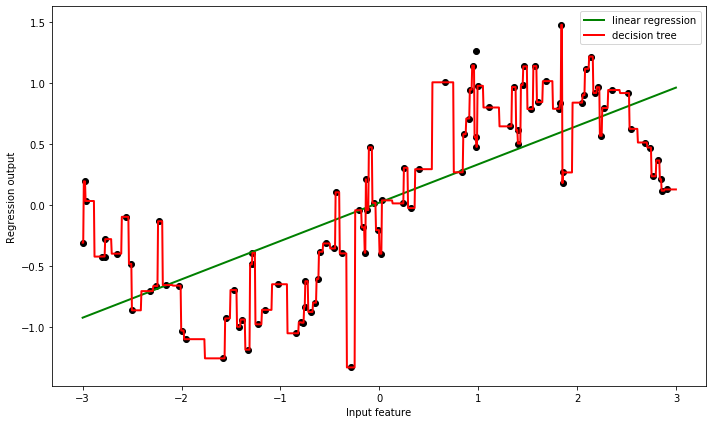

In [77]:
fig, ax1 = plt.subplots(figsize=(10,6))

# 绘制原始用于建模的点分布
ax1.scatter(X,y,c='k',marker='o')

# 绘制线性回归的拟合曲线
ax1.plot(sin_x, linearR.predict(sin_x),linewidth = 2, color='green',  label = 'linear regression')

# 绘制决策树的拟合曲线
ax1.plot(sin_x, treeR.predict(sin_x), linewidth = 2, color='red', label = 'decision tree')

ax1.legend(loc="best") 
ax1.set_ylabel("Regression output") 
ax1.set_xlabel("Input feature")

plt.tight_layout()

## 分箱处理

In [78]:
from sklearn.preprocessing import KBinsDiscretizer

分箱函数的练习

In [79]:
X_ = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]

# strategy='uniform'表示等距分箱
est = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform')
est.fit(X_)

KBinsDiscretizer(encode='onehot-dense', n_bins=3, strategy='uniform')

In [80]:
X_bin = est.transform(X_)

In [81]:
X_bin.shape

(4, 12)

In [82]:
X_bin

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [83]:
#分箱的数量
est.n_bins

3

In [84]:
#每个特征的箱子边界
# 注意，这是一个嵌套数组
est.bin_edges_

array([array([-2., -1.,  0.,  1.]), array([1., 2., 3., 4.]),
       array([-4., -3., -2., -1.]), array([-1.,  0.,  1.,  2.])],
      dtype=object)

对上述模拟的余弦曲线的横坐标进行分箱处理

In [85]:
est = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')
X_bins = est.fit_transform(X)

In [86]:
X[:5,:]

array([[ 2.18255991],
       [-1.29056421],
       [-2.56046167],
       [ 1.57942323],
       [-0.28368565]])

In [87]:
X_bins[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [88]:
X.shape

(100, 1)

In [89]:
X_bins.shape

(100, 10)

In [90]:
est.n_bins

10

In [91]:
est.bin_edges_

array([array([-2.99961903, -2.40870554, -1.81779206, -1.22687858, -0.6359651 ,
       -0.04505162,  0.54586186,  1.13677535,  1.72768883,  2.31860231,
        2.90951579])], dtype=object)

In [92]:
# 对预测的数据x轴也进行相同的分箱处理
sin_x_bin = est.transform(sin_x)

In [93]:
sin_x[:5,:]

array([[-3.        ],
       [-2.99399399],
       [-2.98798799],
       [-2.98198198],
       [-2.97597598]])

In [94]:
sin_x_bin[:5,:]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [95]:
#使用分箱后的数据训练模型
linearR_bin = LinearRegression().fit(X_bins, y)
treeR_bin = DecisionTreeRegressor().fit(X_bins,y)

绘制分箱后的情况

Text(0.5, 0, 'Input feature')

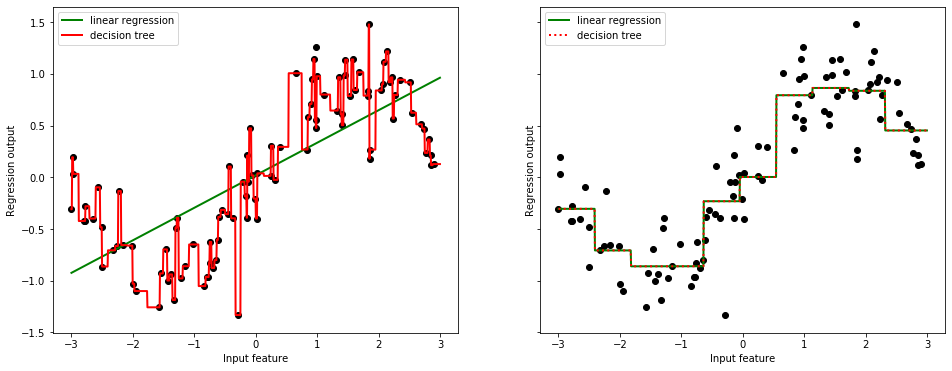

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True, figsize=(16,6))

# 左边的图绘制原有的数据
# 绘制原始用于建模的点分布
ax1.scatter(X,y,c='k',marker='o')
# 绘制线性回归的拟合曲线
ax1.plot(sin_x, linearR.predict(sin_x),linewidth = 2, color='green',  label = 'linear regression')
# 绘制决策树的拟合曲线
ax1.plot(sin_x, treeR.predict(sin_x), linewidth = 2, color='red', label = 'decision tree')
ax1.legend(loc="best") 
ax1.set_ylabel("Regression output") 
ax1.set_xlabel("Input feature")

# 右边的图绘制分箱后的曲线
ax2.scatter(X,y,c='k',marker='o')
# 绘制线性回归的拟合曲线
ax2.plot(sin_x, linearR_bin.predict(sin_x_bin),linewidth = 2, color='green',linestyle='-', label = 'linear regression')
# 绘制决策树的拟合曲线
ax2.plot(sin_x, treeR_bin.predict(sin_x_bin), linewidth = 2,color='red',linestyle=':',label = 'decision tree')
ax2.legend(loc="best") 
ax2.set_ylabel("Regression output") 
ax2.set_xlabel("Input feature")

-------------

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

+ 随机生成数据，x只有一维，类别y取值0或者1

In [29]:
rng = np.random.RandomState(29)
size = 10
x1 = rng.uniform(low=0.0, high=5,size=size)
x2 = rng.uniform(low=6, high=11,size=size)
x = np.hstack((x1,x2)).reshape(-1,1)
print(x.shape)
# x

(20, 1)


In [30]:
y = np.array([0]*size + [1]*size).reshape(-1,1)
print(y.shape)
# y

(20, 1)


In [35]:
df = pd.DataFrame( np.hstack((x,y)) , columns=['x','y'])
# 下面这一列是为了绘图时使用，将 y 转成离散型的 class
df['class'] = df['y'].astype(str)
df.head()

,x,y,class
0,0.645199,0.0,0.0
1,3.210753,0.0,0.0
2,2.393219,0.0,0.0
3,3.290604,0.0,0.0
4,0.416765,0.0,0.0


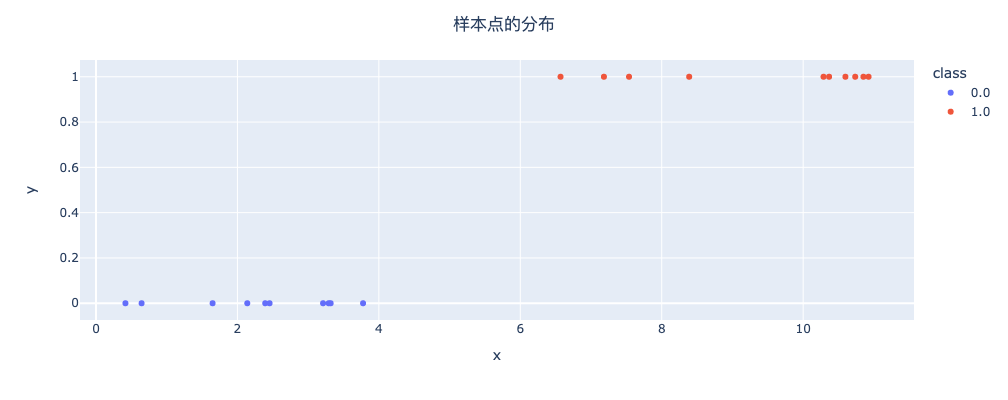

In [128]:
# sns.scatterplot(data=df, x='x', y = 'y', hue='y')
# color 使用 y 的话，默认会将 y 看做连续型的取值
fig = px.scatter(data_frame=df, x='x', y='y', color='class')
fig.update_layout(
    title={'text':'样本点的分布', 'x':0.5},
    width=800, height=400
)
fig.show()

+ 拟合logistic模型并提取系数

In [42]:
lr = LogisticRegression()
lr.fit(df[['x']], df['y'])

LogisticRegression()

In [44]:
lr.fit_intercept

True

In [63]:
print(lr.coef_, ", ", lr.coef_.shape)
print(lr.intercept_, ", ", lr.intercept_.shape)

[[1.3162073]] ,  (1, 1)
[-7.09879321] ,  (1,)


In [151]:
w = lr.coef_[0,0]
b = lr.intercept_[0]
x_ = np.linspace(0,11, 50)

# Logistic回归方程
y_ = 1/(1 + np.exp(-(w*x_+b)))

# 对数几率
log_odds = np.log(y_/(1-y_))

In [152]:
df_ = pd.DataFrame({'x':x_, 'y':y_, 'log_odds':log_odds})
df_['class'] = lr.predict(df_[['x']]).astype(str)
df_.head()

,x,y,log_odds,class
0,0.000000,0.000825,-7.098793,0.0
1,0.224490,0.001109,-6.803318,0.0
2,0.448980,0.001489,-6.507843,0.0
3,0.673469,0.002000,-6.212368,0.0
4,0.897959,0.002686,-5.916893,0.0


下面展示的是样本点的分布和得到的logistic回归曲线的拟合程度

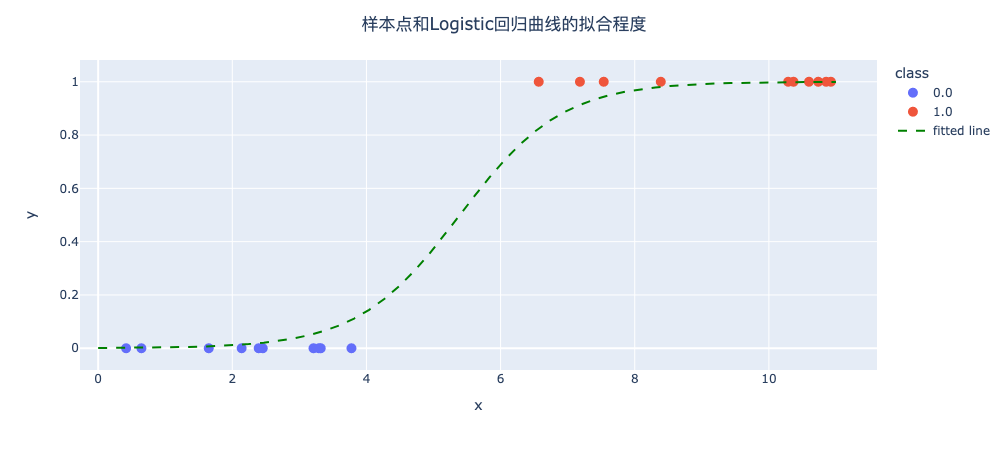

In [153]:
scatter = px.scatter(data_frame=df, x='x', y='y', color='class')
scatter.add_trace(
    go.Scatter(x=df_['x'], y=df_['y'],name='fitted line',
               mode='lines', 
               line={'color':'green','dash':'dash'})
)
scatter.update_traces(
    selector={'mode':'markers'},
    marker={'size':10}
)
scatter.update_layout(
    title={'text':'样本点和Logistic回归曲线的拟合程度', 'x':0.5}
)

# scatter.data
scatter.show()

上面这张图中，红点或者蓝点表示原有的样本，它们的纵坐标取值是0或1；  
虚线是采样点连线组成的拟合Logistic曲线，这些采样点横坐标 $X$ 是从$[0, 11]$取50个点得到，纵坐标的 $y$ 是根据拟合的 $P(y|X) = \frac{1}{1 + exp(-W^T X)}$ 计算得出。

如果对采样点的 $y$ 取 **对数几率** $log(odds) = log(\frac{P(y|X)}{1-P(y|X)}) = log(\frac{1}{exp(-W^T X)}) = -log(exp(-W^T X)) = W^T X $，得到就是下面的图形。 

下图中，横坐标采样点的横坐标，纵坐标就是对数几率，注意，**原有的样本点无法做这样的对数几率变换，因为它们的y是0或者1，不是由Logistic拟合输出**。

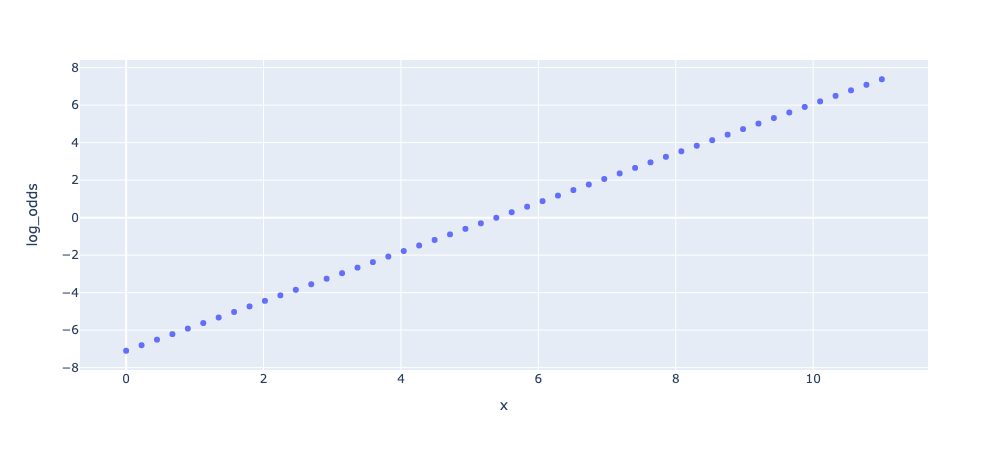

In [154]:
px.scatter(data_frame=df_, x='x', y='log_odds')

值得注意的是，上面采样点连接成的直线中，截距的值是 $(x=0, log\_odds=-7.098793)$，这个截距的值刚好就是LR拟合的`b = lr.intercept_[0]`，并且这条直线的斜率，就是LR拟合的`w = lr.coef_[0,0]`。

In [158]:
b

-7.098793207341459

In [159]:
w

1.3162072970807701